# Titanic-Selección de atributos y Arbol de decisión

### Realizar una hipótesis sobre quiénes se salvaron en el Titanic.Para esto, el modelo predictivo a utilizar serán Árboles de Decisión


### Proceso previo al entrenamiento del modelo  el que se hace un análisis, limpieza y estructuración de los campos de los datos.

* Eliminación (registro entero, o feature entera) o sustitución de valores no conocidos 
* Creación de características que agrupen varias, o extraerlas de datos no estructurados
* Análisis para eliminar las características menos importantes

In [1]:
%matplotlib inline  

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Empecemos por cargar nuestro archivo a un array con numpy o pandas

In [2]:
titanic = pd.read_csv("titanic.csv")
print(titanic)
titanic.describe()

      row.names pclass  survived  \
0             1    1st         1   
1             2    1st         0   
2             3    1st         0   
3             4    1st         0   
4             5    1st         1   
5             6    1st         1   
6             7    1st         1   
7             8    1st         0   
8             9    1st         1   
9            10    1st         0   
10           11    1st         0   
11           12    1st         1   
12           13    1st         1   
13           14    1st         1   
14           15    1st         0   
15           16    1st         1   
16           17    1st         0   
17           18    1st         0   
18           19    1st         1   
19           20    1st         1   
20           21    1st         1   
21           22    1st         0   
22           23    1st         1   
23           24    1st         1   
24           25    1st         1   
25           26    1st         0   
26           27    1st      

,row.names,survived,age
count,1313.000000,1313.000000,633.000000
mean,657.000000,0.341965,31.194181
std,379.174762,0.474549,14.747525
min,1.000000,0.000000,0.166700
25%,329.000000,0.000000,21.000000
50%,657.000000,0.000000,30.000000
75%,985.000000,1.000000,41.000000
max,1313.000000,1.000000,71.000000


In [3]:
titanic.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [4]:
print(titanic)
print(titanic.head()[['pclass', 'survived', 'age', 'embarked', 'room', 'sex']])

      row.names pclass  survived  \
0             1    1st         1   
1             2    1st         0   
2             3    1st         0   
3             4    1st         0   
4             5    1st         1   
5             6    1st         1   
6             7    1st         1   
7             8    1st         0   
8             9    1st         1   
9            10    1st         0   
10           11    1st         0   
11           12    1st         1   
12           13    1st         1   
13           14    1st         1   
14           15    1st         0   
15           16    1st         1   
16           17    1st         0   
17           18    1st         0   
18           19    1st         1   
19           20    1st         1   
20           21    1st         1   
21           22    1st         0   
22           23    1st         1   
23           24    1st         1   
24           25    1st         1   
25           26    1st         0   
26           27    1st      

In [5]:
import csv
with open('titanic.csv', 'r') as csvfile:
    titanic_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    
    # Importo el dataset como array de numpy
    titanic_dataset = np.array([ row for row in titanic_reader])

### La lista de atributos es: row.names, pClass, Survived (0=no, 1=yes), Name, Age, Embarked, Home/Destination,Room, Ticket, Boat, and Sex.

In [6]:
# La primera fila tiene los nombres de los atributos
feature_names = titanic_dataset[0]
print(feature_names)

['row.names' 'pclass' 'survived' 'name' 'age' 'embarked' 'home.dest' 'room'
 'ticket' 'boat' 'sex']


In [7]:
#vemos la primera tupla del dataset
print (titanic_dataset[1])

['1' '1st' '1' 'Allen, Miss Elisabeth Walton' '29.0000' 'Southampton'
 'St Louis, MO' 'B-5' '24160 L221' '2' 'female']


In [8]:
# En la columna 2 tenemos la clase que queremos predecir (es decir, si sobrevivió o no)
# Vale 1 si sobrevivió, 0 si no.
titanic_y=titanic_dataset[1:,2].astype(float)
print(titanic_y)

[ 1.  0.  0. ...,  0.  0.  0.]


In [9]:
# Elegimos las columnas que tiene la clase, la edad, y el sexo
titanic_x = titanic_dataset[1:, [1, 4, 10]]
print(titanic_x[10:20].tolist())
print(titanic_y[10:20].tolist())

[['1st', '47.0000', 'male'], ['1st', '19.0000', 'female'], ['1st', 'NA', 'female'], ['1st', 'NA', 'male'], ['1st', 'NA', 'male'], ['1st', '50.0000', 'female'], ['1st', '24.0000', 'male'], ['1st', '36.0000', 'male'], ['1st', '37.0000', 'male'], ['1st', '47.0000', 'female']]
[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0]


### Al observar la edad en algunos casos aparecen valores nulos(NA)

In [10]:
# Calculo la edad promedio
edades = titanic_x[:, 1]
edad_promedio=np.mean(titanic_x[edades != 'NA', 1].astype(np.float))
print(edad_promedio)

# Actualizo
titanic_x[titanic_x[:, 1] == 'NA', 1] = edad_promedio

31.1941810427


In [11]:
print(titanic_x)

[['1st' '29.0000' 'female']
 ['1st' ' 2.0000' 'female']
 ['1st' '30.0000' 'male']
 ..., 
 ['3rd' '31.19418104265403' 'male']
 ['3rd' '31.19418104265403' 'female']
 ['3rd' '31.19418104265403' 'male']]


### La principal dificultad que tenemos ahora es que los métodos de scikit-learn trabajan con  números.Exiten métodos de preprocesamiento como LabelEncoder y OneHotEncoder que permiten convertir manualmente ciertas características categóricas en valores numéricos. También podemos usar otros métodos como DictVectorizer, que construye automáticamente estas características de los diferentes valores de características

### Ahora vamos a analizar los atributos clase y sexo.
### El clasificador que vamos a usar espera atributos que son números reales y hoy los tenemos como categorías. Empecemos por sexo: solamente hay dos categorías, por lo que podemos decir que femenino es 0 y masculino es 1. scikit-learn nos provee de una clase LabelEncoder que hace esto

In [12]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

# Le paso los valores que tengo y el asigna un entero a cada clase posible
#sexo male,female los cambios por 0,1
label_encoder = enc.fit(titanic_x[:, 2])
print("Categorical classes:", label_encoder.classes_)

# usamos transform para transformar las clases por los nuúmeros 0,1
tranform = label_encoder.transform(titanic_x[:, 2])
titanic_x[:, 2] = tranform
print (titanic_x[10:20].tolist(), titanic_y[10:20].tolist())

Categorical classes: ['female' 'male']
[['1st', '47.0000', '1'], ['1st', '19.0000', '0'], ['1st', '31.19418104265403', '0'], ['1st', '31.19418104265403', '1'], ['1st', '31.19418104265403', '1'], ['1st', '50.0000', '0'], ['1st', '24.0000', '1'], ['1st', '36.0000', '1'], ['1st', '37.0000', '1'], ['1st', '47.0000', '0']] [0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0]


### Bien, nos resta la clase del pasajero. Tenemos primera(1st), segunda(2nd) y tercera(3rd) clase. Para evitar un ordenamiento implícito vamos a usar una técnica llamada "One Hot Encoding". Lo mejor es verlo con un ejemplo,    pero la idea es convertir cada atributo en n, siendo n los valores posibles de ese atributo. Para este caso, generaremos los atributos: primera_clase, segunda_clase, y tercera_clase, valuados en 0/1.

In [13]:
from sklearn.preprocessing import OneHotEncoder
lencoder = LabelEncoder()
label_encoder = lencoder.fit(titanic_x[:,0])
integer_classes = label_encoder.transform(label_encoder.classes_).reshape(3,1)

enc = OneHotEncoder()
one_hot_encoder=enc.fit(integer_classes)

# Primero, convierta clases a 0- (N-1) enteros usando el codificador label_encoder
num_of_rows = titanic_x.shape[0]
t = label_encoder.transform(titanic_x[:, 0]).reshape(num_of_rows, 1)

# En segundo lugar, cree una matriz dispersa con tres columnas, cada una indicando si la instancia pertenece a la clase
new_features = one_hot_encoder.transform(t)

# Añadir las nuevas features a titanic_x
titanic_x = np.concatenate([titanic_x, new_features.toarray()], axis = 1)

#Eliminar columnas convertidas
titanic_x = np.delete(titanic_x, [0], 1)

# Actualizar los nombre de las features
feature_names = ['edad', 'sexo', 'primera_clase', 'segunda_clase', 'tercera_clase']

# Convertir a valores numéricos
titanic_x = titanic_x.astype(float)
titanic_y = titanic_y.astype(float)

print (titanic_x[10:20].tolist())

[[47.0, 1.0, 1.0, 0.0, 0.0], [19.0, 0.0, 1.0, 0.0, 0.0], [31.19418104265403, 0.0, 1.0, 0.0, 0.0], [31.19418104265403, 1.0, 1.0, 0.0, 0.0], [31.19418104265403, 1.0, 1.0, 0.0, 0.0], [50.0, 0.0, 1.0, 0.0, 0.0], [24.0, 1.0, 1.0, 0.0, 0.0], [36.0, 1.0, 1.0, 0.0, 0.0], [37.0, 1.0, 1.0, 0.0, 0.0], [47.0, 0.0, 1.0, 0.0, 0.0]]


In [14]:
print (titanic_y[10:20].tolist())

[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0]


In [15]:
print('Nombre de las nuevas features:',feature_names)
print('Valores:',titanic_x[0])
print('Target(sobrevivido o no):', titanic_y[0])

Nombre de las nuevas features: ['edad', 'sexo', 'primera_clase', 'segunda_clase', 'tercera_clase']
Valores: [ 29.   0.   1.   0.   0.]
Target(sobrevivido o no): 1.0


In [16]:
print(titanic_x)

[[ 29.           0.           1.           0.           0.        ]
 [  2.           0.           1.           0.           0.        ]
 [ 30.           1.           1.           0.           0.        ]
 ..., 
 [ 31.19418104   1.           0.           0.           1.        ]
 [ 31.19418104   0.           0.           0.           1.        ]
 [ 31.19418104   1.           0.           0.           1.        ]]


In [17]:
#array que devuelve para pasajero si ha sobrevido(1) o no(0)
print(titanic_y)

[ 1.  0.  0. ...,  0.  0.  0.]


#### En este punto ya tenemos listo el dataset normalizado.
#### A partir de ahora comienza el proceso de aprendizaje donde aplicaremos arbol de decision. Vamos primero separar el dataset en dos: un conjunto de entrenamiento y otro de testeo. Trabajaremos siempre sobre el de entrenamiento, y dejamos el de testeo para evaluar nuestros resultados. Lo dividimos en 75/25:

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_x, titanic_y, test_size=0.25, random_state=33)

### Árboles de Decision mediante el modelo DecisionTreeClassifier

In [19]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
classifier = classifier.fit(X_train,y_train)

### El árbol de decisiones que hemos construido representa una serie de decisiones basadas en los datos de entrenamiento. Para clasificar una instancia, debemos responder a la pregunta en cada nodo. Por ejemplo, en nuestro nodo raíz, la pregunta es: ¿Es el sexo <= 0.5? (¿Estamos hablando de una mujer?). Si la respuesta es sí, se va al nodo hijo izquierdo en el árbol; De lo contrario, ir al nodo secundario correcto. Sigues respondiendo preguntas (¿estaba ella en la tercera clase ?, ¿estaba en la primera clase ?, ¿y tenía menos de 13 años?), Hasta llegar a una hoja. Cuando usted está allí, la predicción corresponde a la clase de destino que tiene la mayoría de los casos (es decir, si las respuestas se dan a las preguntas anteriores). En nuestro caso, si ella era una mujer de segunda clase, la respuesta sería 1 (sobrevivió), y así sucesivamente. Vamos a dibujar, usando pyplot:

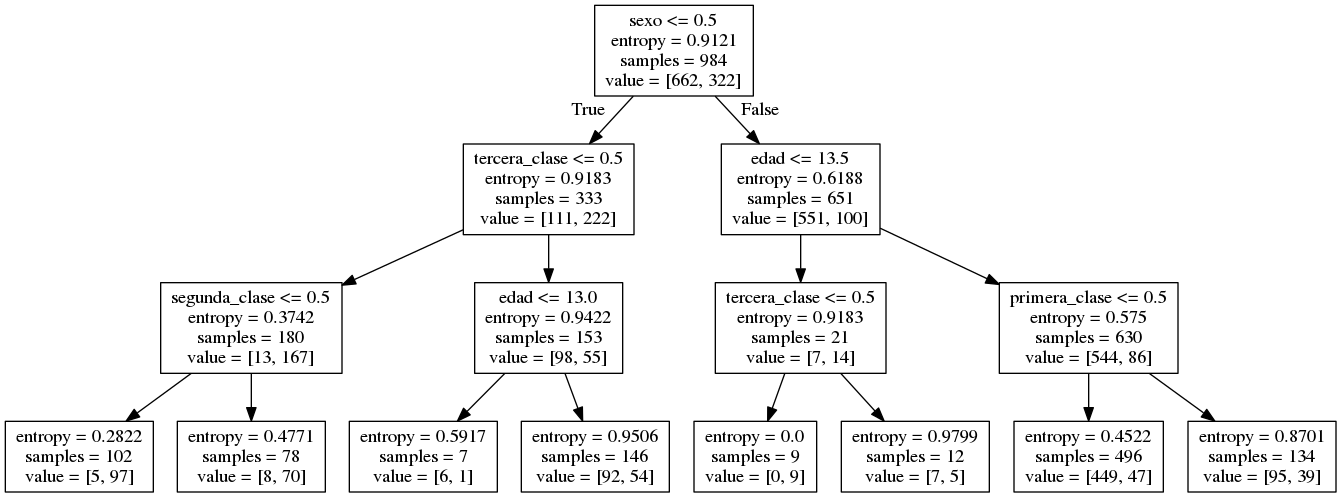

In [20]:
from IPython.core.display import Image 
Image(filename='titanic.png')

### Predecir nuestro modelo

### Veamos cómo funciona nuestro modelo. Supongamos que había un hombre de 30 años en segunda clase ¿se hubiera salvado?

In [21]:
print (classifier.predict([[30.0,1.0,0.0,1.0,0.0]]))

[ 0.]


### Una mujer de 20 años en primera clase si se hubiera salvado

In [22]:
print (classifier.predict([[10.0,0.0,1.0,0.0,0.0]]))

[ 1.]


### Pero, ¿cómo sabemos lo bien que funciona nuestro clasificador? Empecemos por evaluarlo sobre los propios datos de entrenamiento, y viendo en cuántos casos acierta (esta medida se llama accuracy)... y algunas medidas más.

In [23]:
from sklearn import metrics
def measure_performance(X,y,classifier, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=classifier.predict(X)   
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
        
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")
        
measure_performance(X_train,y_train,classifier, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.838 

Classification report
             precision    recall  f1-score   support

        0.0       0.82      0.98      0.89       662
        1.0       0.93      0.55      0.69       322

avg / total       0.85      0.84      0.82       984
 

Confusion matrix
[[649  13]
 [146 176]] 



### El accuracy obtenido resulta de evaluar sobre los mismos datos que utilizamos para crear el modelo. Lo mejor en este punto es hacer la evaluación sobre los datos de test

In [24]:
measure_performance(X_test,y_test, classifier, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.793 

Classification report
             precision    recall  f1-score   support

        0.0       0.77      0.96      0.85       202
        1.0       0.88      0.54      0.67       127

avg / total       0.81      0.79      0.78       329
 

Confusion matrix
[[193   9]
 [ 59  68]] 



### Podríamos usar cross validation donde para cada instancia en la muestra de entrenamiento, nos entrenamos en el resto de la muestra, y evaluamos el modelo.

In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train)
print(scores)
print(np.mean(scores))

[ 0.83890578  0.80182927  0.85015291]
0.830295982856


### Preprocesamiento e Ingeniería de Atributos con DictVectorizer

In [26]:
from sklearn import feature_extraction

def one_hot_dataframe(data, cols, replace=False):
    vec = feature_extraction.DictVectorizer()
    mkdict = lambda row: dict((col, row[col]) for col in cols)
    vecData = pd.DataFrame(vec.fit_transform(data[cols].apply(mkdict, axis=1)).toarray())
    vecData.columns = vec.get_feature_names()
    vecData.index = data.index
    if replace:
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return (data, vecData)

titanic, titanic_n = one_hot_dataframe(titanic, ['pclass', 'embarked'], replace=True)

In [27]:
titanic["age"] = titanic["age"].fillna(titanic["age"].median())

In [28]:
titanic.loc[titanic["sex"] == "male", "sex"] = 0
titanic.loc[titanic["sex"] == "female", "sex"] = 1

In [29]:
titanic["embarked"].unique()

array([  0.,  nan])

In [30]:
titanic["embarked"] = titanic["embarked"].fillna("0")

titanic.loc[titanic["embarked"] == "Southampton", "embarked"] = 0
titanic.loc[titanic["embarked"] == "Cherbourg", "embarked"] = 1
titanic.loc[titanic["embarked"] == "Queenstown", "embarked"] = 2

In [31]:
#Como de buena es la feature Embarked?
print(titanic[titanic['embarked'] != 0].head())

     row.names  survived                            name   age  \
62          63         0    Chisholm, Mr Roderick Robert  30.0   
165        166         0              Lingrey, Mr Edward  30.0   
195        196         0  Ovies y Rodriguez, Mr Servando  28.0   
196        197         0    Parr, Mr William Henry Marsh  30.0   
229        230         0        Silvey, Mr William Baird  50.0   

                        home.dest room ticket   boat sex embarked  \
62   Liverpool, England / Belfast  NaN    NaN    NaN   0        0   
165                           NaN  NaN    NaN    NaN   0        0   
195                 ?Havana, Cuba  NaN    NaN  (189)   0        0   
196                       Belfast  NaN    NaN    NaN   0        0   
229                    Duluth, MN  NaN    NaN    NaN   0        0   

     embarked=Cherbourg  embarked=Queenstown  embarked=Southampton  \
62                  0.0                  0.0                   0.0   
165                 0.0                  0.0    

In [32]:
#Edad media
print(titanic['age'].describe())
mean = titanic['age'].mean()
titanic['age'].fillna(mean, inplace=True)
print(titanic['age'].describe())

count    1313.000000
mean       30.575717
std        10.252932
min         0.166700
25%        30.000000
50%        30.000000
75%        30.000000
max        71.000000
Name: age, dtype: float64
count    1313.000000
mean       30.575717
std        10.252932
min         0.166700
25%        30.000000
50%        30.000000
75%        30.000000
max        71.000000
Name: age, dtype: float64


In [33]:
#Comletar n/a con zeros
titanic.fillna(0, inplace=True)

In [34]:
titanic, titanic_n = one_hot_dataframe(titanic, ['home.dest', 'room', 'ticket', 'boat'], replace=True)
print(titanic.head())

   row.names  survived                                             name  \
0          1         1                     Allen, Miss Elisabeth Walton   
1          2         0                      Allison, Miss Helen Loraine   
2          3         0              Allison, Mr Hudson Joshua Creighton   
3          4         0  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)   
4          5         1                    Allison, Master Hudson Trevor   

       age  sex embarked  embarked=Cherbourg  embarked=Queenstown  \
0  29.0000    1        0                 0.0                  0.0   
1   2.0000    1        0                 0.0                  0.0   
2  30.0000    0        0                 0.0                  0.0   
3  25.0000    1        0                 0.0                  0.0   
4   0.9167    0        0                 0.0                  0.0   

   embarked=Southampton  pclass=1st      ...        ticket=248744 L13  \
0                   1.0         1.0      ...                 

In [35]:
# Importar regresión lineal
from sklearn.linear_model import LinearRegression

# Sklearn cross validation
from sklearn.cross_validation import KFold


def linear_regression_train (predictor, p=True):
    # Inicializar regresion lineal
    linear_regression= LinearRegression()
    # validacion cruzada sobre el titanic dataset
    # devuele los indices de las filas correspondientes a entrenamiento y test
    # random_state=1 para asegurarnos de tener las mismas particiones cada vez que lo ejecutemos
    kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
    predictions = []
    for train, test in kf:
        train_predictor = (titanic[predictor].iloc[train,:])
        train_target = titanic["survived"].iloc[train]
        # entrenemos al algoritmo usando el predictor y el objetivo
        linear_regression.fit(train_predictor, train_target)
        test_predictions = linear_regression.predict(titanic[predictor].iloc[test,:])
        predictions.append(test_predictions)

    # las predicciones se encuentran en 3 arrays separados.
    # es necesario concatenarlos
    predictions = np.concatenate(predictions, axis=0)
    # Obtener mapa de predicciones
    predictions[predictions > .5] = 1
    predictions[predictions <=.5] = 0
    aciertos = sum(predictions == titanic["survived"])
    accuracy = sum(predictions == titanic["survived"])  / len(predictions)
    if p:
        print ("aciertos %f  accuracy %f " %  (aciertos, accuracy) )
    else:
        return aciertos, accuracy

/home/jmoc/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
linear_regression_train(["pclass=1st","pclass=2nd","pclass=3rd","sex", "age"])

aciertos 966.000000  accuracy 0.735720 


In [37]:
#matriz de correlación
#https://es.wikipedia.org/wiki/Matriz_de_correlaci%C3%B3n
titanic.corr()

,row.names,survived,age,sex,embarked=Cherbourg,embarked=Queenstown,embarked=Southampton,pclass=1st,pclass=2nd,pclass=3rd,...,ticket=248744 L13,ticket=248749 L13,ticket=250647,ticket=27849,ticket=28220 L32 10s,ticket=34218 L10 10s,ticket=36973 L83 9s 6d,ticket=392091,ticket=7076,ticket=L15 1s
row.names,1.000000,-0.355689,-0.208287,-0.122218,-0.404665,0.004915,-0.487475,-0.745179,-0.267162,0.863036,...,-0.004225,-0.016753,-0.008959,-0.022143,-0.032826,-0.006410,-0.054049,-0.004173,-0.003351,-0.004079
survived,-0.355689,1.000000,-0.046042,0.499584,0.220187,-0.012253,0.107008,0.309320,0.091133,-0.341994,...,-0.019902,-0.019902,-0.019902,0.038297,0.032756,0.038297,0.013012,0.054181,-0.019902,-0.019902
age,-0.208287,-0.046042,1.000000,-0.019813,0.129109,-0.022836,-0.059332,0.345368,-0.094617,-0.220424,...,-0.001551,0.036161,0.009224,0.014611,-0.012027,-0.009632,0.037821,-0.080636,-0.001551,-0.001551
sex,-0.122218,0.499584,-0.019813,1.000000,0.116475,0.044964,-0.029106,0.109130,0.032162,-0.120665,...,-0.020376,-0.020376,-0.020376,0.037407,-0.001932,0.037407,0.012047,0.012047,-0.020376,-0.020376
embarked=Cherbourg,-0.404665,0.220187,0.129109,0.116475,1.000000,-0.080563,-0.376312,0.451542,-0.078639,-0.325234,...,-0.011806,-0.011806,-0.011806,-0.011806,-0.020465,-0.011806,-0.016703,-0.016703,-0.011806,0.064557
embarked=Queenstown,0.004915,-0.012253,-0.022836,0.044964,-0.080563,1.000000,-0.165771,-0.078192,-0.026536,0.089328,...,-0.005201,-0.005201,-0.005201,-0.005201,-0.009015,-0.005201,-0.007358,-0.007358,-0.005201,-0.005201
embarked=Southampton,-0.487475,0.107008,-0.059332,-0.029106,-0.376312,-0.165771,1.000000,0.094511,0.430436,-0.435443,...,0.031374,0.031374,0.031374,0.031374,0.054383,0.031374,0.044387,0.044387,0.031374,-0.024294
pclass=1st,-0.745179,0.309320,0.345368,0.109130,0.451542,-0.078192,0.094511,1.000000,-0.296770,-0.619481,...,-0.015737,-0.015737,-0.015737,-0.015737,-0.027278,-0.015737,0.068521,-0.022264,-0.015737,-0.015737
pclass=2nd,-0.267162,0.091133,-0.094617,0.032162,-0.078639,-0.026536,0.430436,-0.296770,1.000000,-0.565803,...,0.053028,0.053028,0.053028,0.053028,0.091917,0.053028,-0.020335,-0.020335,-0.014373,0.053028
pclass=3rd,0.863036,-0.341994,-0.220424,-0.120665,-0.325234,0.089328,-0.435443,-0.619481,-0.565803,1.000000,...,-0.030003,-0.030003,-0.030003,-0.030003,-0.052007,-0.030003,-0.042447,0.035940,0.025404,-0.030003


## Seleccionando los mejores atributos

In [38]:
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from itertools import compress

#creamos un array con todos los atributos
atributos=["pclass=1st","pclass=2nd","pclass=3rd", "age","boat","room","embarked","sex"]

X = titanic[atributos]

Y = titanic["survived"]

#aquí podemos usar linearRegression o LogisticRegression
model = LinearRegression(normalize=True, copy_X=True)
#model = LogisticRegression()

# creamos el modelo que permite la selección de los mejores atributos
model_feature_selection = RFE(model)
model_feature_selection = model_feature_selection.fit(X, Y)

# puntuación de la seleccion de atributos
print(model_feature_selection.support_)
print(model_feature_selection.ranking_)

best_features = list(compress(atributos, model_feature_selection.support_))
best_features

[ True  True  True False False False False  True]
[1 1 1 2 4 5 3 1]


['pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex']

In [39]:
linear_regression_train(best_features)

aciertos 955.000000  accuracy 0.727342 


In [40]:
import itertools
best_accuracy = 0
all_feat = ["pclass=1st", "pclass=2nd", "pclass=3rd","sex"]
for i in range(1,len(all_feat)+1):
    for combo in itertools.combinations(all_feat, i):
        _, accuracy = linear_regression_train(list(combo), p=False)
        if (accuracy>best_accuracy):
            best_accuracy=accuracy
            best_feat=combo
print (best_feat, best_accuracy)

('pclass=3rd', 'sex') 0.773800456969


In [41]:
from sklearn.cross_validation import train_test_split
titanic_target = titanic['survived']
titanic_data = titanic.drop(['name', 'row.names', 'survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(titanic_data, titanic_target, test_size=0.25, random_state=33)

In [42]:
from sklearn import tree
decisionTreeClassifier = tree.DecisionTreeClassifier(criterion='entropy')
decisionTreeClassifier = decisionTreeClassifier.fit(X_train, y_train)

In [43]:
from sklearn import metrics
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print( "Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [44]:
from sklearn import metrics
measure_performance(X_test, y_test, decisionTreeClassifier, show_confussion_matrix=True, show_classification_report=True)

Accuracy:0.827 

Classification report
             precision    recall  f1-score   support

          0       0.82      0.93      0.87       202
          1       0.85      0.67      0.75       127

avg / total       0.83      0.83      0.82       329
 

Confussion matrix
[[187  15]
 [ 42  85]] 



## Selección de características

### Trabajar con un conjunto de características más pequeño puede conducir a mejores resultados. El objetivo ahora es encontrar las mejores características o features. Esta tarea se llama selección de características y es un paso importante cuando pretendemos obtener resultados más optimos con algoritmos de aprendizaje automático. Podemos seleccionar por ejemplo el 25% de las características más importantes.

In [45]:
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=25)
X_train_fs = fs.fit_transform(X_train, y_train)
print(fs)
print(titanic_data.columns[fs.get_support()])

SelectPercentile(percentile=25, score_func=<function chi2 at 0x7f754b45dc80>)
Index(['age', 'sex', 'embarked=Cherbourg', 'embarked=Southampton',
       'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'boat=1', 'boat=10',
       'boat=11',
       ...
       'room=C-125', 'room=C-7', 'room=D-35', 'ticket=111361 L57 19s 7d',
       'ticket=13502 L77', 'ticket=17582 L153 9s 3d',
       'ticket=17608 L262 7s 6d', 'ticket=230136 L39', 'ticket=24160 L221',
       'ticket=392091'],
      dtype='object', length=144)


### Evaluar el rendimiento con el nuevo conjunto de datos

In [46]:
decisionTreeClassifier.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, decisionTreeClassifier, show_confussion_matrix=True, show_classification_report=True)

Accuracy:0.836 

Classification report
             precision    recall  f1-score   support

          0       0.83      0.92      0.87       202
          1       0.84      0.71      0.77       127

avg / total       0.84      0.84      0.83       329
 

Confussion matrix
[[185  17]
 [ 37  90]] 

